# Regression Tree and Random forest. Bagging and boosting

This notebook aims to provide a practical overview of regression trees, random forests, as well as bagging and boosting. After this workshop, the student should be able to know:
* how to apply regression trees, random forests, or a bagging / boosting approach
* when to apply regression trees, random forests, or a bagging / boosting approach

In [1]:
# Imports Libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor   
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Kaggle: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

## 1. Data Preprocessing and Exploration

### a. Load your dataset

In [3]:
df = pd.read_csv('files//drug200.csv')

df['Cholesterol'] = df['Cholesterol'] + '-Chol'
df['BP'] = df['BP'] + '-BP'

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH-BP,HIGH-Chol,25.355,drugY
1,47,M,LOW-BP,HIGH-Chol,13.093,drugC
2,47,M,LOW-BP,HIGH-Chol,10.114,drugC
3,28,F,NORMAL-BP,HIGH-Chol,7.798,drugX
4,61,F,LOW-BP,HIGH-Chol,18.043,drugY


### b. [OPTIONAL] Preprocess the data

Depending on your dataset, you can perform different techniques of data preprocessing such as dropping NaN values, create dummy variables or standardize your data.

In [4]:
df = df.dropna()

sex_binary = pd.get_dummies(df['Sex'])
sex_binary = sex_binary.astype(int)

BP_binary = pd.get_dummies(df['BP'])
BP_binary = BP_binary.astype(int)

Chol_binary = pd.get_dummies(df['Cholesterol'])
Chol_binary = Chol_binary.astype(int)


Drug_binary = pd.get_dummies(df['Drug'])
Drug_binary = Drug_binary.astype(int)

### c. Split the dataset into features (independent variables) and target variable (dependent variable) 

In [5]:
X = pd.concat([sex_binary, BP_binary, Chol_binary, df['Age']], axis = 1)
y = Drug_binary

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (200, 8), y shape: (200, 5)


### d. Split the dataset into training and testing sets

In [6]:
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state) 
# Make one column with categories between 1 and 5, instead of matrix
y_train,y_test = [np.sum(np.array(set)*np.arange(1,set.shape[1]+1)[np.newaxis,:],axis = 1) for set in [y_train,y_test]]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (160, 8), y_train shape: (160,)
X_test shape: (40, 8), y_test shape: (40,)


## 2. Regression Tree

In this exercise, we will use sklearn.tree.DecisionTreeRegressor.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Define and train the model

In [7]:
regression_tree = DecisionTreeRegressor(max_depth=3) 

model = regression_tree.fit(X_train,y_train)

### Make predictions and evaluate the model

In [8]:
y_pred_cart = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test,y_pred_cart)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7528606046886128


### Examples of visualization techniques for qualitative interpretations and analysis

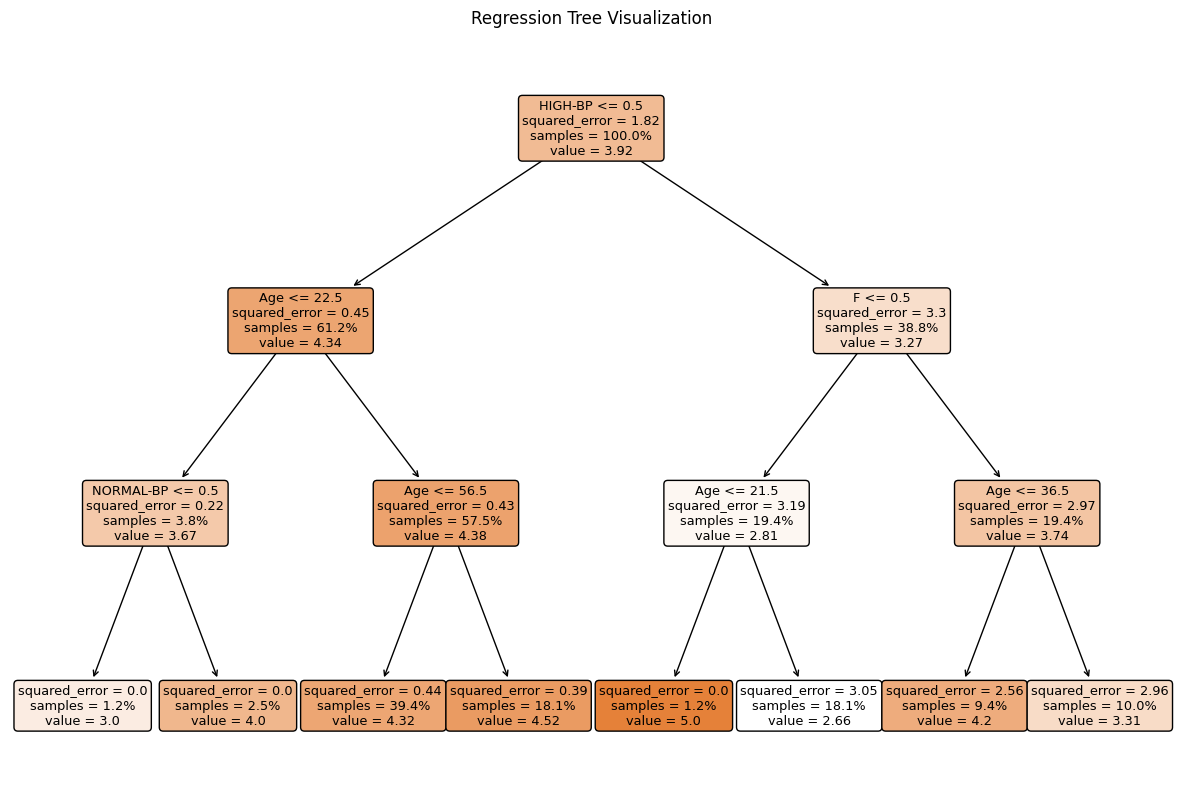

In [10]:
# Visualize the regression tree using plot_tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2)
plt.title("Regression Tree Visualization")
plt.show()

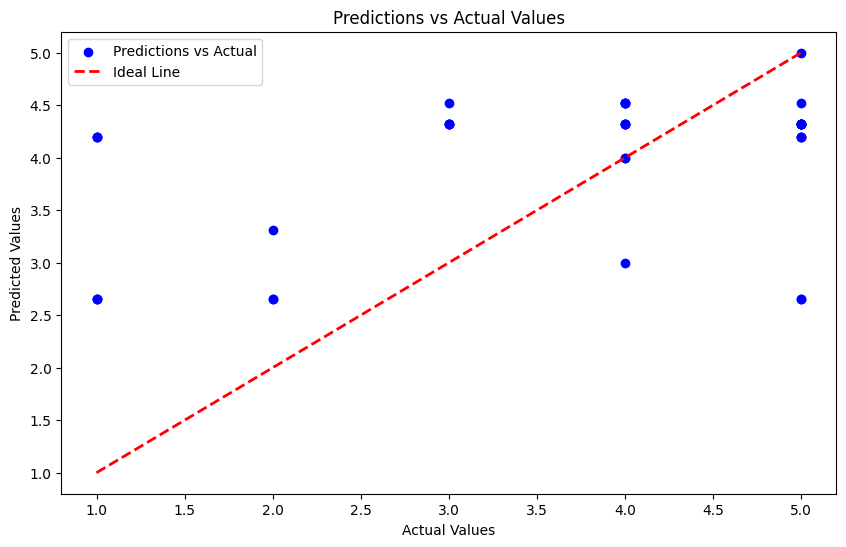

In [11]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cart, color='blue', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 3. Random Forest

In this exercise, we will use the class sklearn.ensemble.RandomForestRegressor.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Define and train the model

In [12]:

rf_model = RandomForestRegressor(max_depth = 3)

model = rf_model.fit(X_train, y_train)

### Make predictions and evaluate the model

In [13]:

y_pred_rf = model.predict(X_test)

In [14]:

mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.4530556630792524


## 4. Understand the parameters of random forest

### Feature importantces

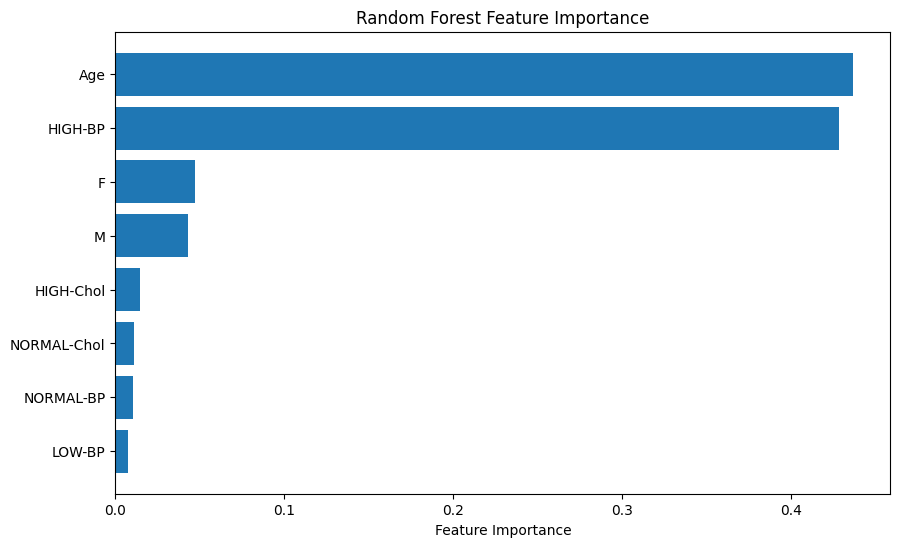

In [15]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

What does this figure mean? Which feature is the most important?

The Age is the most important predictor, then BP whether it is high or normal, then cholesterol and sex

#### Visualization

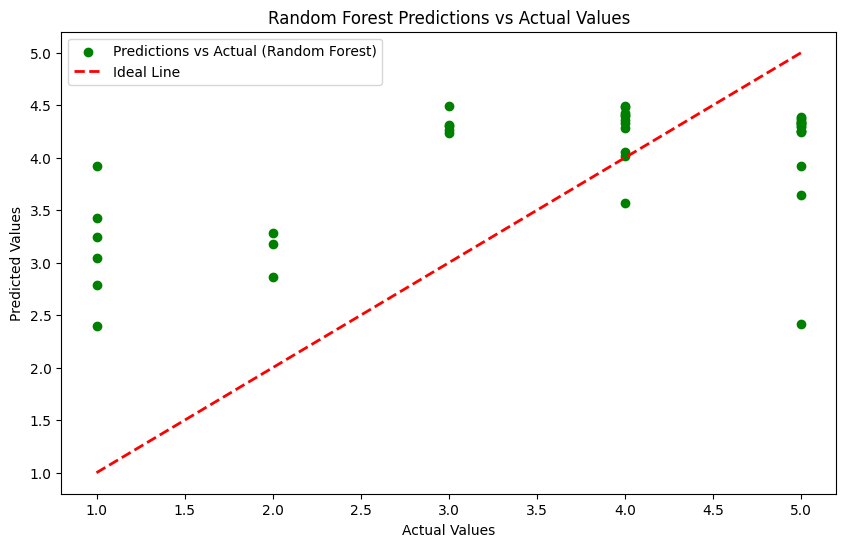

In [16]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

What if we use fewer or more estimators in random forest? Plot the curve to see how the MSE change for different value of n_estimators.

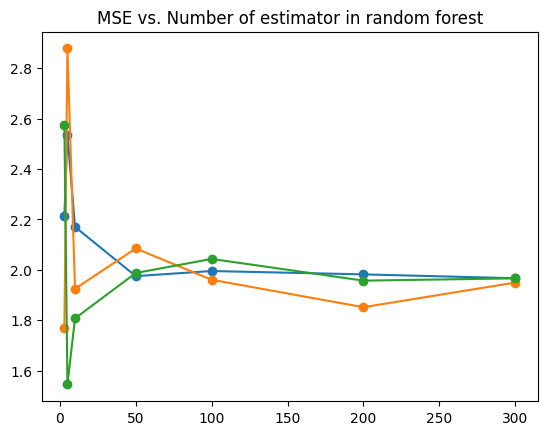

In [17]:
nList = [3,5,10,50,100,200,300]
for x in range(3):
    mseList = []
    for nEst in nList:
        rf_model = RandomForestRegressor(nEst)
        model = rf_model.fit(X_train, y_train)
        y_pred_rf = model.predict(X_test)
        mseList.append(mean_squared_error(y_test, y_pred_rf))

    plt.plot(nList,mseList,"-o")
plt.title('MSE vs. Number of estimator in random forest')
plt.show()

In the following part, we are going to cover two fundamental ensemble learning techniques: **Bagging** and **Boosting**

## 5. Bagging - Training and Evaluating a Model of Your Choice
The function sklearn.ensemble.BaggingRegressor can be utilized to perform the bagging on your own algorithms.

Try to implement it in a way that the base estimator is the linear regression model.

If you want to find more information about the hyperparameters that this method uses, please visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [18]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

bagging_model = BaggingRegressor()
model = bagging_model.fit(X_train, y_train)

y_pred_bagging = model.predict(X_test)

mse_bagging = mean_squared_error(y_test,y_pred_bagging)
print(f'Mean Squared Error (Bagging): {mse_bagging}')

Mean Squared Error (Bagging): 1.8207014583333332


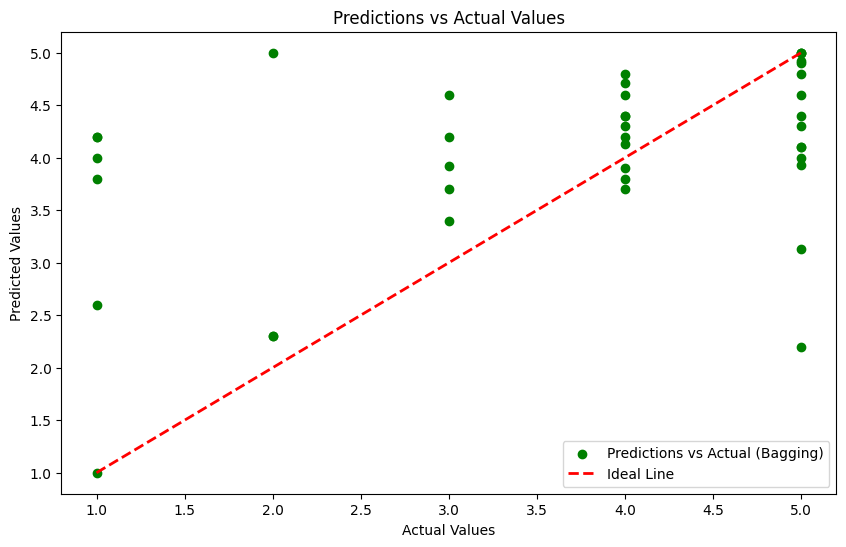

In [19]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual (Bagging)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 6. Boosting

#### AdaBoost Regressor

In [20]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor()


adaboost_model = adaboost_model.fit(X_train,y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

mse_adaboost = mean_squared_error(y_test,y_pred_adaboost)

print(f'Mean Squared Error (AdaBoost): {mse_adaboost}')

Mean Squared Error (AdaBoost): 1.574063582129932


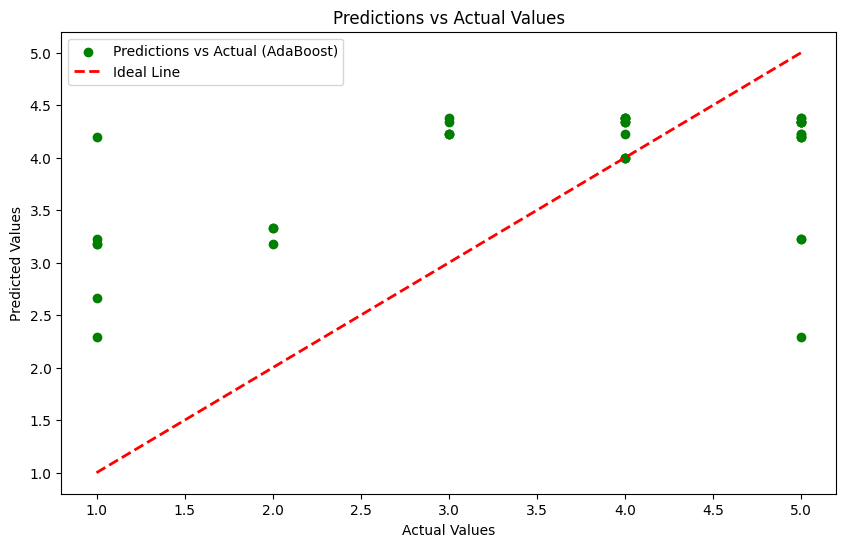

In [21]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#### XGBoost Regressor

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Defining and fitting the model
xgb_model = XGBRegressor(max_depth=3, n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

Mean Squared Error (XGBoost): 2.385459925682416


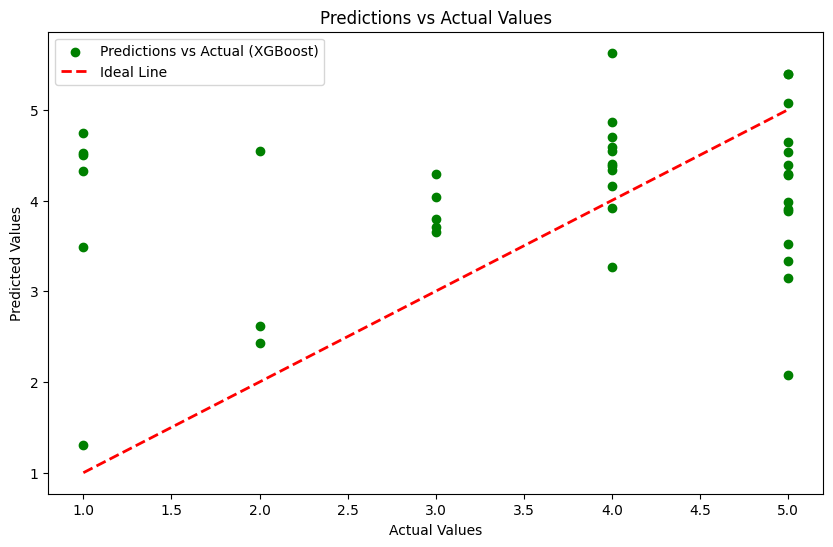

In [23]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 8. Interpretation of your results

Use this space to analyse the performance of your trained models throughout this workshop. Some examples of ideas include:
* discussing about the influence of some hyperparameters (e.g.: max_depth for Decision Tree, n_estimators for Random Forest, etc.)
* comparing the results you obtained using plots or tables


Regression tree:

- mse = 1.75, max_depth = 3

- The most important predictor is High BP, then both gender(Male) and age less or equal to 22.5

- The results are floats

Random forest

- mse = 1.5, max_depth = 3

- The most importnat predictor is Age, then high BP, Male, Female

- Results are classes

